In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Loading data

In [3]:
train = pd.read_csv("../data/train.csv")

In [4]:
predict = pd.read_csv("../data/predict.csv")

# Exploring

In [5]:
train.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   0.50      Ideal     D     VS2   62.3   55.0  5.11  5.07  3.17   1845
1   1   1.54       Good     I     VS1   63.6   60.0  7.30  7.33  4.65  10164
2   2   1.32  Very Good     J     SI2   61.7   60.0  6.95  7.01  4.31   5513
3   3   1.20      Ideal     I     SI1   62.1   55.0  6.83  6.79  4.23   5174
4   4   1.73    Premium     I     SI1   61.2   60.0  7.67  7.65  4.69  10957

In [6]:
train.shape

(40455, 11)

In [7]:
train.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
train.dtypes

id           int64
carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

# Handling categorical data

## Cut

In [9]:
train["cut"].unique()

array(['Ideal', 'Good', 'Very Good', 'Premium', 'Fair'], dtype=object)

In [10]:
cuts = train["cut"].value_counts()
cuts

Ideal        16152
Premium      10321
Very Good     9040
Good          3729
Fair          1213
Name: cut, dtype: int64

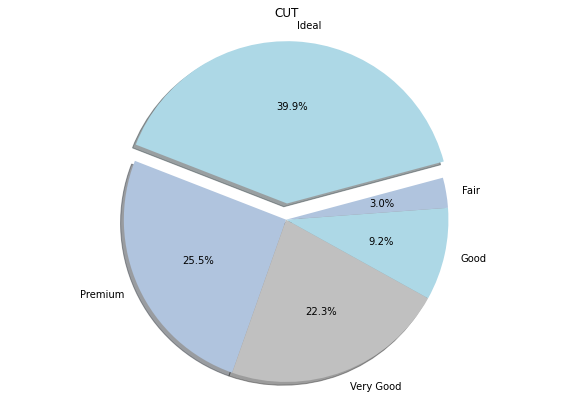

In [15]:
plt.figure(figsize=(10,7))

my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(cuts, labels=cuts.index, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('CUT')
plt.axis('equal')
plt.show()

In [ ]:
my_colors = ['lightblue','lightsteelblue','silver']
my_explode = (0.1, 0, 0, 0, 0)
plt.pie(top_5, labels=top_5.index, autopct='%1.1f%%', startangle=15, shadow = True, colors=my_colors, explode=my_explode)
plt.title('SUBCATEGORIES')
plt.axis('equal')
plt.show()

#### Assigning a value to each category
1 = Fair vs. 5 = Ideal

In [10]:
cut = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}

In [11]:
train["cut"] = train["cut"].map(cut)

In [12]:
train["cut"].unique()

array([5, 2, 3, 4, 1])

In [13]:
train["cut"].value_counts()

5    16152
4    10321
3     9040
2     3729
1     1213
Name: cut, dtype: int64

## Color

In [14]:
train["color"].unique()

array(['D', 'I', 'J', 'G', 'E', 'H', 'F'], dtype=object)

In [15]:
train["color"].value_counts()

G    8469
E    7282
F    7199
H    6210
D    5098
I    4091
J    2106
Name: color, dtype: int64

#### Assigning a value to each category
1 = D vs. 7 = J

In [16]:
color = {"D":1, "E":2, "F":3, "G":4, "H":5, "I":6, "J":7}

In [17]:
train["color"] = train["color"].map(color)

In [18]:
train["color"].unique()

array([1, 6, 7, 4, 2, 5, 3])

In [19]:
train["color"].value_counts()

4    8469
2    7282
3    7199
5    6210
1    5098
6    4091
7    2106
Name: color, dtype: int64

## Clarity

In [20]:
train["clarity"].unique()

array(['VS2', 'VS1', 'SI2', 'SI1', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [21]:
train["clarity"].value_counts()

SI1     9758
VS2     9272
SI2     6895
VS1     6151
VVS2    3799
VVS1    2692
IF      1321
I1       567
Name: clarity, dtype: int64

#### Assigning a value to each category
1 = I1 vs. 8 = IF

In [22]:
clarity = {"I1":1, "SI2":2, "SI1":3, "VS2":4, "VS1":5, "VVS2":6, "VVS1":7, "IF":8}

In [23]:
train["clarity"] = train["clarity"].map(clarity)

In [24]:
train["clarity"].unique()

array([4, 5, 2, 3, 6, 7, 1, 8])

In [25]:
train["clarity"].value_counts()

3    9758
4    9272
2    6895
5    6151
6    3799
7    2692
8    1321
1     567
Name: clarity, dtype: int64

## Correlation

In [26]:
corr = train.corr()
corr

id     carat       cut     color   clarity     depth     table  \
id       1.000000 -0.005640  0.003877 -0.004952 -0.004246  0.001335 -0.007937   
carat   -0.005640  1.000000 -0.135198  0.294212 -0.350039  0.026242  0.183268   
cut      0.003877 -0.135198  1.000000 -0.025948  0.190523 -0.219215 -0.434853   
color   -0.004952  0.294212 -0.025948  1.000000  0.025203  0.052073  0.027061   
clarity -0.004246 -0.350039  0.190523  0.025203  1.000000 -0.068171 -0.164441   
depth    0.001335  0.026242 -0.219215  0.052073 -0.068171  1.000000 -0.296991   
table   -0.007937  0.183268 -0.434853  0.027061 -0.164441 -0.296991  1.000000   
x       -0.005818  0.975538 -0.126384  0.273145 -0.369195 -0.026495  0.197330   
y       -0.004904  0.944843 -0.121461  0.264365 -0.352933 -0.030529  0.184213   
z       -0.006368  0.967968 -0.152219  0.276464 -0.370560  0.095624  0.156565   
price   -0.004630  0.921776 -0.052246  0.174569 -0.144279 -0.013715  0.127199   

                x         y         z     price  
id      -0.005818 -0.004904 -0.006368 -0.004630  
carat    0.975538  0.944843  0.967968  0.921776  
cut     -0.126384 -0.121461 -0.152219 -0.052246  
color    0.273145  0.264365  0.276464  0.174569  
clarity -0.369195 -0.352933 -0.370560 -0.144279  
depth   -0.026495 -0.030529  0.095624 -0.013715  
table    0.197330  0.184213  0.156565  0.127199  
x        1.000000  0.967690  0.985338  0.884862  
y        0.967690  1.000000  0.960890  0.859062  
z        0.985338  0.960890  1.000000  0.873913  
price    0.884862  0.859062  0.873913  1.000000

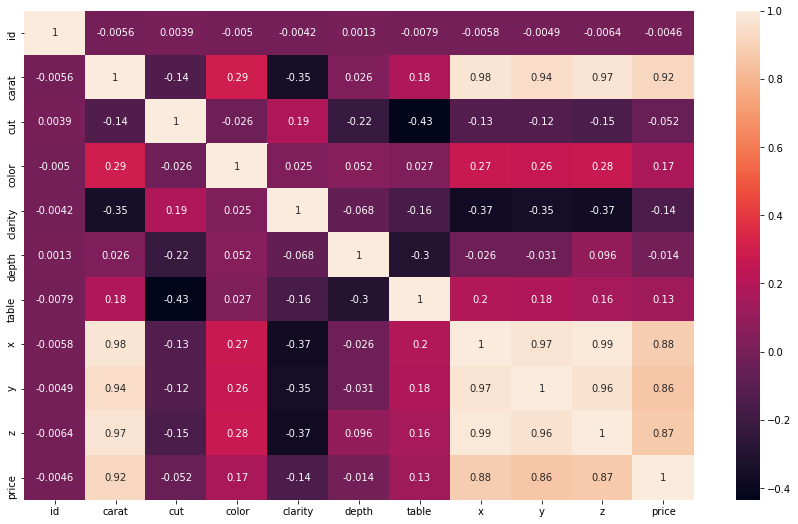

In [27]:
plt.figure(figsize=(15,9))
sns.heatmap(corr, annot=True);

#### Observation:
From all the diamond characteristics, the ones that are more correlated to the price are:
- caract (0.92)
- x (0.88)
- y (0.86)
- z (0.87)

However, x, y and z are very strongly correlated between each other, which means that overall, they are reproducing very similar information (and we don't want that)

### Dropping x, y, z

In [28]:
train_clean = train.drop(["x", "y", "z"], axis=1)

In [29]:
train_clean.to_csv("../data/train_c")

In [30]:
corr_clean = train_clean.corr()
corr_clean

id     carat       cut     color   clarity     depth     table  \
id       1.000000 -0.005640  0.003877 -0.004952 -0.004246  0.001335 -0.007937   
carat   -0.005640  1.000000 -0.135198  0.294212 -0.350039  0.026242  0.183268   
cut      0.003877 -0.135198  1.000000 -0.025948  0.190523 -0.219215 -0.434853   
color   -0.004952  0.294212 -0.025948  1.000000  0.025203  0.052073  0.027061   
clarity -0.004246 -0.350039  0.190523  0.025203  1.000000 -0.068171 -0.164441   
depth    0.001335  0.026242 -0.219215  0.052073 -0.068171  1.000000 -0.296991   
table   -0.007937  0.183268 -0.434853  0.027061 -0.164441 -0.296991  1.000000   
price   -0.004630  0.921776 -0.052246  0.174569 -0.144279 -0.013715  0.127199   

            price  
id      -0.004630  
carat    0.921776  
cut     -0.052246  
color    0.174569  
clarity -0.144279  
depth   -0.013715  
table    0.127199  
price    1.000000

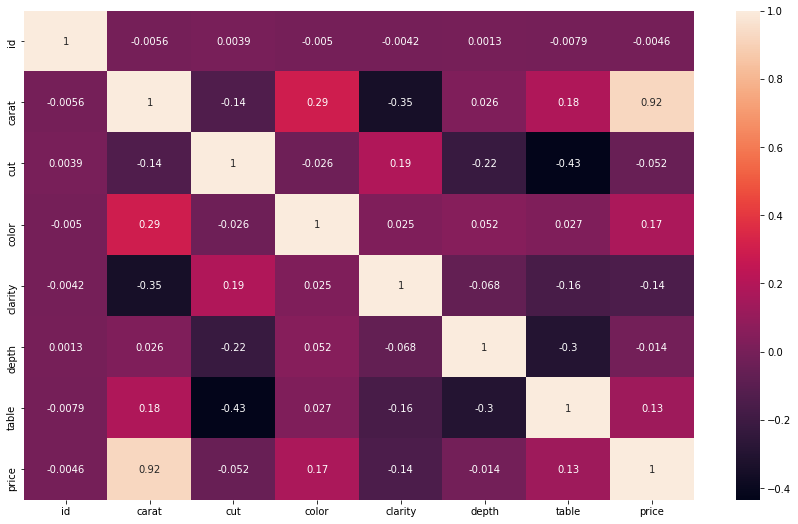

In [31]:
plt.figure(figsize=(15,9))
sns.heatmap(corr_clean, annot=True);

#### Observation:
With x, y and z dropped, **carat** is still the most strongly correlated variable to PRICE. Let's keep that in mind

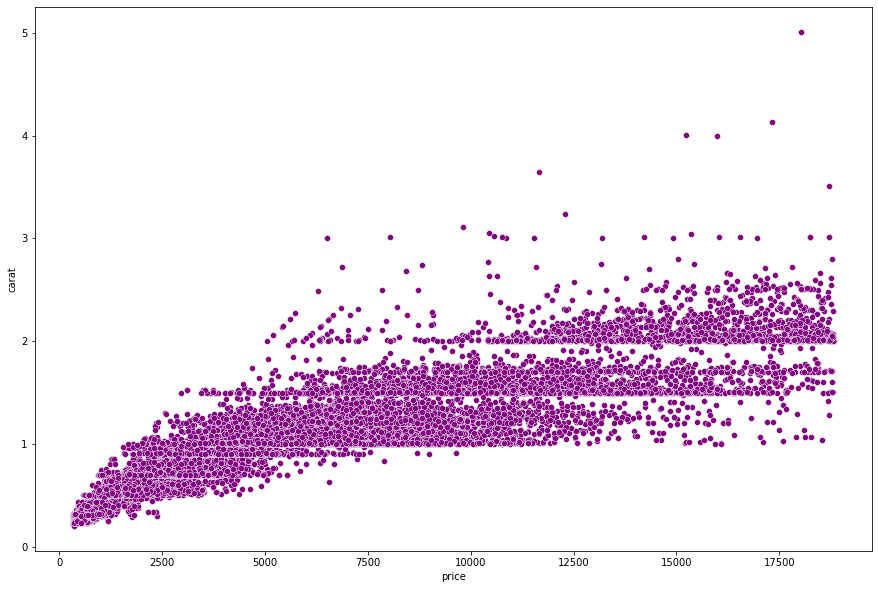

In [32]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=train["price"], y=train["carat"], color="purple");

#### Observation:
The higher the **price**, the higher the **carat**. They both grow simultaneously

#### Once we have:
- explored the dataset,
- checked that there are no null values,
- converted the categorical variables into numerical,
- dropped those columns that provide similar information,
#### we are ready to proceed searchcing for the most optimal model

# Model 1 - Linear Regression

80% train

In [33]:
X = train_clean.drop(columns=["price"])
y = train_clean["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [34]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
print(f"Coefficient = {model.coef_}\n")
print(f"Intercept = {model.intercept_}")

Coefficient = [ 7.27434451e-04  8.81588185e+03  1.21572324e+02 -3.22129926e+02
  5.25173335e+02 -5.16352736e+01 -2.88436847e+01]

Intercept = 289.31632432898095


In [36]:
y_pred = model.predict(X_test)

- Metrics

In [37]:
r2 = r2_score(y_pred, y_test)
print(f"R squared is = {r2}")
print("-"*45)
rmse = mean_squared_error(y_pred, y_test)**0.5
print(f"Root mean squared error is = {rmse}")

R squared is = 0.8965700045019916
---------------------------------------------
Root mean squared error is = 1213.4370099622422


## To deliver

In [38]:
predict.head()

id  carat      cut color clarity  depth  table     x     y     z
0   0   0.45  Premium     E     SI1   62.8   58.0  4.88  4.84  3.05
1   1   1.23    Ideal     H     SI1   61.0   56.0  6.96  6.92  4.23
2   2   0.33    Ideal     I      IF   61.8   55.0  4.46  4.47  2.76
3   3   0.51  Premium     D     VS2   58.0   60.0  5.29  5.26  3.06
4   4   0.40  Premium     E     VS2   62.2   59.0  4.71  4.74  2.94

In [39]:
predict_clean = predict.drop(["x", "y", "z"], axis=1)

In [40]:
predict_clean["cut"] = predict_clean["cut"].map(cut)
predict_clean["color"] = predict_clean["color"].map(color)
predict_clean["clarity"] = predict_clean["clarity"].map(clarity)

In [41]:
predict_clean.head()

id  carat  cut  color  clarity  depth  table
0   0   0.45    4      2        3   62.8   58.0
1   1   1.23    5      5        3   61.0   56.0
2   2   0.33    5      6        8   61.8   55.0
3   3   0.51    4      1        4   58.0   60.0
4   4   0.40    4      2        4   62.2   59.0

In [42]:
predict_clean.to_csv("../data/predict_c")

In [43]:
y_pred_predict_test = model.predict(predict_clean)

In [44]:
y_pred_predict_test

array([ 758.38371458, 6940.585691  , 1297.56497374, ..., 1743.42370477,
       -521.39730709, 5164.78743414])

In [45]:
predict_clean["price"] = y_pred_predict_test
predict_clean.head()

id  carat  cut  color  clarity  depth  table        price
0   0   0.45    4      2        3   62.8   58.0   758.383715
1   1   1.23    5      5        3   61.0   56.0  6940.585691
2   2   0.33    5      6        8   61.8   55.0  1297.564974
3   3   0.51    4      1        4   58.0   60.0  2324.804013
4   4   0.40    4      2        4   62.2   59.0   844.903347

In [46]:
sub_1 = predict_clean[["id","price"]]
sub_1

id        price
0          0   758.383715
1          1  6940.585691
2          2  1297.564974
3          3  2324.804013
4          4   844.903347
...      ...          ...
13480  13480 -1904.459925
13481  13481  4853.528814
13482  13482  1743.423705
13483  13483  -521.397307
13484  13484  5164.787434

[13485 rows x 2 columns]

In [47]:
sub_1 = sub_1.set_index("id")
sub_1

price
id                
0       758.383715
1      6940.585691
2      1297.564974
3      2324.804013
4       844.903347
...            ...
13480 -1904.459925
13481  4853.528814
13482  1743.423705
13483  -521.397307
13484  5164.787434

[13485 rows x 1 columns]

#### Exporting prediction # 1

In [48]:
sub_1.to_csv("../predictions/1.1")